In [1]:
# Importation of Data manipulation libraries
import pandas as pd
import numpy as np

# Importation of visualisation libraries
from matplotlib import pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile

    Ajoutons la colonnes Machine,Date,Shift au tableau de OEE

In [2]:
df = pd.read_excel('OEE 1 mois (1).xls')

In [3]:
df.shape

(3534, 26)

In [4]:
pd.set_option('display.max_rows',df.shape[0]+1)
pd.set_option('display.max_columns',df.shape[0]+1)

In [5]:
df.head()

,Machine,Shift Day,Shift,Availability,Performance,Quality,OEE,Total Time (min),Breaks Meetings (min),Available Time (min),Uptime (min),Downtime (min),Good Parts,Waste,Total Cuts,Actual Cuts/Hour,Target Cuts/Hour,Breaks Shift cal. (min),Breaks (min),Meetings (min),No. of Setups,All Setup Time (min),Machine Downtime (min),No Work (min),Fail Time (min),Machine Not Running (min)
0,63,2018-01-31,S3,NaN,NaN,NaN,NaN,480,0,480,0,480,0,0,0,0,2300,15,0,0,0,0,0,480,0,0
1,61,2018-01-31,S3,54.0,89.0,100.0,48.0,480,1,479,264,215,9010,0,9010,2049,2300,15,1,0,19,133,0,0,0,82
2,60,2018-01-31,S3,62.0,86.0,100.0,53.0,480,18,462,302,160,10000,0,10000,1989,2300,15,18,0,17,96,0,0,0,64
3,57,2018-01-31,S3,79.0,80.0,100.0,63.0,480,1,479,384,95,11732,0,11732,1835,2300,15,1,0,13,69,0,0,0,26
4,56,2018-01-31,S3,62.0,94.0,100.0,58.0,480,12,468,300,169,10789,0,10789,2161,2300,15,12,0,24,121,0,4,0,43


In [6]:
df.shape

(3534, 26)

In [7]:
liste1=[]
for m in df['Machine']:
    liste1.append(m)

In [8]:
liste1

[63,
 61,
 60,
 57,
 56,
 55,
 54,
 53,
 52,
 51,
 50,
 49,
 48,
 44,
 43,
 40,
 39,
 38,
 32,
 29,
 28,
 26,
 25,
 24,
 23,
 22,
 21,
 15,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 1,
 63,
 61,
 60,
 57,
 56,
 55,
 54,
 53,
 52,
 51,
 50,
 49,
 48,
 44,
 43,
 40,
 39,
 38,
 32,
 29,
 28,
 26,
 25,
 24,
 23,
 22,
 21,
 15,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 1,
 63,
 61,
 60,
 57,
 56,
 55,
 54,
 53,
 52,
 51,
 50,
 49,
 48,
 44,
 43,
 40,
 39,
 38,
 32,
 29,
 28,
 26,
 25,
 24,
 23,
 22,
 21,
 15,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 1,
 63,
 61,
 60,
 57,
 56,
 55,
 54,
 53,
 52,
 51,
 50,
 49,
 48,
 44,
 43,
 40,
 39,
 38,
 32,
 29,
 28,
 26,
 25,
 24,
 23,
 22,
 21,
 15,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 1,
 63,
 61,
 60,
 57,
 56,
 55,
 54,
 53,
 52,
 51,
 50,
 49,
 48,
 44,
 43,
 40,
 39,
 38,
 32,
 29,
 28,
 26,
 25,
 24,
 23,
 22,
 21,
 15,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 1,
 63,
 61,
 60,
 57,
 56,
 55,
 54,
 53,
 52,
 51,
 50,
 49,
 48,
 44,
 43,
 40,
 39,
 38,


In [9]:
liste2=[]
for e in df['Shift Day']:
    liste2.append(e)

In [10]:
liste2

[Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-01-

In [11]:
liste3=[]
for e in df['Shift']:
    liste3.append(e)

In [12]:
liste3

['S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',

In [13]:
liste4=[]
for e in range(len(liste3)):
    liste4.append(str(liste1[e])[:2]+','+str(liste2[e])[:10]+','+str(liste3[e]))

In [14]:
liste_df=pd.DataFrame(liste4,columns=['Machine,Date,Shift'])
liste_df

,"Machine,Date,Shift"
0,"63,2018-01-31,S3"
1,"61,2018-01-31,S3"
2,"60,2018-01-31,S3"
3,"57,2018-01-31,S3"
4,"56,2018-01-31,S3"
5,"55,2018-01-31,S3"
6,"54,2018-01-31,S3"
7,"53,2018-01-31,S3"
8,"52,2018-01-31,S3"
9,"51,2018-01-31,S3"


In [15]:
df1=pd.DataFrame()
df1=pd.concat([df, liste_df], axis=1)

In [16]:
df1.head()

,Machine,Shift Day,Shift,Availability,Performance,Quality,OEE,Total Time (min),Breaks Meetings (min),Available Time (min),Uptime (min),Downtime (min),Good Parts,Waste,Total Cuts,Actual Cuts/Hour,Target Cuts/Hour,Breaks Shift cal. (min),Breaks (min),Meetings (min),No. of Setups,All Setup Time (min),Machine Downtime (min),No Work (min),Fail Time (min),Machine Not Running (min),"Machine,Date,Shift"
0,63,2018-01-31,S3,NaN,NaN,NaN,NaN,480,0,480,0,480,0,0,0,0,2300,15,0,0,0,0,0,480,0,0,"63,2018-01-31,S3"
1,61,2018-01-31,S3,54.0,89.0,100.0,48.0,480,1,479,264,215,9010,0,9010,2049,2300,15,1,0,19,133,0,0,0,82,"61,2018-01-31,S3"
2,60,2018-01-31,S3,62.0,86.0,100.0,53.0,480,18,462,302,160,10000,0,10000,1989,2300,15,18,0,17,96,0,0,0,64,"60,2018-01-31,S3"
3,57,2018-01-31,S3,79.0,80.0,100.0,63.0,480,1,479,384,95,11732,0,11732,1835,2300,15,1,0,13,69,0,0,0,26,"57,2018-01-31,S3"
4,56,2018-01-31,S3,62.0,94.0,100.0,58.0,480,12,468,300,169,10789,0,10789,2161,2300,15,12,0,24,121,0,4,0,43,"56,2018-01-31,S3"


In [17]:
df1.shape

(3534, 27)

Concatenation des trois tableaux d'Historique

In [18]:
f1 = pd.read_excel('Historique partie_1.xls')

In [19]:
f1

,Batch Size (Pcs/Bdl),Quantity (Pcs),Good Parts (Pcs),Plan Workstation,Actual Start Date,Actual End Date,Plan Time (min/Bdl),Prod. Time (min),Setup Time (min),Pers. No.,Machine Setup Waste (Pcs),Machine Waste (Pcs),Manual Waste (Pcs),Wire Left,Actual Workstation,Wire Left Length,Terminal Right,Wire Left CrossSection,Terminal Left,Seal Left,Seal Right,Stripping Length Left,Stripping Length Right
0,100,1500,1500,60,02.01.2018 10:58:,02.01.2018 12:10:,6.45,96.75,16.5,12177,0,0,0,970000446,60,800,910000853.0,0.35,910000852.0,NaN,NaN,3.5,3.5
1,100,1000,1000,60,02.01.2018 12:18:,02.01.2018 13:00:,5.16,51.60,17.5,12177,0,0,0,970003080,60,2930,910001621.0,0.35,910001705.0,930000341.0,NaN,3.3,3.3
2,100,1000,1000,60,03.01.2018 13:12:,03.01.2018 13:53:,3.54,35.40,13.5,12177,0,0,0,970000450,60,2200,NaN,0.35,910000638.0,NaN,NaN,4.0,15.0
3,100,50,50,57,08.01.2018 01:10:,08.01.2018 01:17:,2.58,1.29,5.0,13646,0,0,0,970000036,57,210,NaN,0.50,910001624.0,NaN,NaN,3.6,15.0
4,100,100,100,56,03.01.2018 14:01:,03.01.2018 14:17:,3.54,3.54,6.5,11807,0,0,0,970001879,56,2150,NaN,0.35,910001548.0,NaN,NaN,4.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8477,100,100,0,10,08.01.2018 11:07:,08.01.2018 11:25:,2.58,2.58,10.0,13133,0,0,79,970000038,10,200,NaN,0.50,910000409.0,NaN,NaN,4.0,15.0
8478,100,50,0,7,02.01.2018 08:07:,02.01.2018 14:38:,4.82,2.41,11.0,8162,0,0,6,970000346,7,4550,NaN,0.35,910001549.0,NaN,NaN,3.5,15.0
8479,100,100,0,7,09.01.2018 05:56:,09.01.2018 06:11:,6.72,6.72,19.0,12974,0,0,100,970002049,7,1700,910001366.0,0.35,910000725.0,930250046.0,NaN,3.8,3.8
8480,100,700,0,6,10.01.2018 07:58:,10.01.2018 08:27:,2.90,20.30,10.0,7756,0,0,152,970002569,6,950,910001503.0,0.35,NaN,NaN,NaN,15.0,3.5


In [20]:
f1=f1.drop(['Pers.  No.','Actual  Workstation'],axis=1)

In [21]:
f1.shape

(8482, 21)

In [22]:
f2 = pd.read_excel('Historique partie_2.xls')

In [23]:
f3 = pd.read_excel('Historique partie_3.xls')

In [24]:
data=pd.concat([f1,f2,f3],ignore_index=True)

In [25]:
data.head()

,Batch Size (Pcs/Bdl),Quantity (Pcs),Good Parts (Pcs),Plan Workstation,Actual Start Date,Actual End Date,Plan Time (min/Bdl),Prod. Time (min),Setup Time (min),Machine Setup Waste (Pcs),Machine Waste (Pcs),Manual Waste (Pcs),Wire Left,Wire Left Length,Terminal Right,Wire Left CrossSection,Terminal Left,Seal Left,Seal Right,Stripping Length Left,Stripping Length Right
0,100,1500,1500,60,02.01.2018 10:58:,02.01.2018 12:10:,6.45,96.75,16.5,0,0,0,970000446,800,910000853.0,0.35,910000852.0,NaN,NaN,3.5,3.5
1,100,1000,1000,60,02.01.2018 12:18:,02.01.2018 13:00:,5.16,51.60,17.5,0,0,0,970003080,2930,910001621.0,0.35,910001705.0,930000341.0,NaN,3.3,3.3
2,100,1000,1000,60,03.01.2018 13:12:,03.01.2018 13:53:,3.54,35.40,13.5,0,0,0,970000450,2200,NaN,0.35,910000638.0,NaN,NaN,4.0,15.0
3,100,50,50,57,08.01.2018 01:10:,08.01.2018 01:17:,2.58,1.29,5.0,0,0,0,970000036,210,NaN,0.50,910001624.0,NaN,NaN,3.6,15.0
4,100,100,100,56,03.01.2018 14:01:,03.01.2018 14:17:,3.54,3.54,6.5,0,0,0,970001879,2150,NaN,0.35,910001548.0,NaN,NaN,4.0,15.0


In [26]:
times = []
for act_date in data['Actual Start Date']:
    times.append(int(act_date[-6:-4]))

In [27]:
#times

In [28]:
pd.set_option('max_columns', None)

In [29]:
data.shape

(25753, 21)

In [30]:
shifts = []
for t in times:
    if 14 > t >= 6:
        shifts.append('S1')
    elif 22 > t >= 14:
        shifts.append('S2')
    else:
        shifts.append('S3')

In [31]:
len(shifts)

25753

In [32]:
Sh = pd.DataFrame(columns=['Shifts'])
Sh['Shifts'] = shifts

In [33]:
df = pd.concat([data, Sh], axis=1)

In [34]:
df.head()

,Batch Size (Pcs/Bdl),Quantity (Pcs),Good Parts (Pcs),Plan Workstation,Actual Start Date,Actual End Date,Plan Time (min/Bdl),Prod. Time (min),Setup Time (min),Machine Setup Waste (Pcs),Machine Waste (Pcs),Manual Waste (Pcs),Wire Left,Wire Left Length,Terminal Right,Wire Left CrossSection,Terminal Left,Seal Left,Seal Right,Stripping Length Left,Stripping Length Right,Shifts
0,100,1500,1500,60,02.01.2018 10:58:,02.01.2018 12:10:,6.45,96.75,16.5,0,0,0,970000446,800,910000853.0,0.35,910000852.0,NaN,NaN,3.5,3.5,S1
1,100,1000,1000,60,02.01.2018 12:18:,02.01.2018 13:00:,5.16,51.60,17.5,0,0,0,970003080,2930,910001621.0,0.35,910001705.0,930000341.0,NaN,3.3,3.3,S1
2,100,1000,1000,60,03.01.2018 13:12:,03.01.2018 13:53:,3.54,35.40,13.5,0,0,0,970000450,2200,NaN,0.35,910000638.0,NaN,NaN,4.0,15.0,S1
3,100,50,50,57,08.01.2018 01:10:,08.01.2018 01:17:,2.58,1.29,5.0,0,0,0,970000036,210,NaN,0.50,910001624.0,NaN,NaN,3.6,15.0,S3
4,100,100,100,56,03.01.2018 14:01:,03.01.2018 14:17:,3.54,3.54,6.5,0,0,0,970001879,2150,NaN,0.35,910001548.0,NaN,NaN,4.0,15.0,S2


In [35]:
dates = []
for dt in data['Actual Start Date']:
    dates.append(str(dt)[:10].replace('.', "-"))

len(dates)

25753

In [36]:
import datetime

In [37]:
date = []
for i in range(len(dates)):
    date.append(datetime.datetime.strptime(dates[i], '%d-%m-%Y').strftime('%Y-%m-%d'))

In [38]:
date[0:4]

['2018-01-02', '2018-01-02', '2018-01-03', '2018-01-08']

In [39]:
day_df = pd.DataFrame(columns=['Day Shift'])
day_df['Day Shift'] = date
day_df

,Day Shift
0,2018-01-02
1,2018-01-02
2,2018-01-03
3,2018-01-08
4,2018-01-03
...,...
25748,2018-01-29
25749,2018-01-29
25750,2018-01-25
25751,2018-01-23


In [40]:
Historique_df = pd.concat([df[['Plan  Workstation', 'Shifts']], day_df], axis=1)
Historique_df

,Plan Workstation,Shifts,Day Shift
0,60,S1,2018-01-02
1,60,S1,2018-01-02
2,60,S1,2018-01-03
3,57,S3,2018-01-08
4,56,S2,2018-01-03
...,...,...,...
25748,7,S2,2018-01-29
25749,6,S3,2018-01-29
25750,5,S2,2018-01-25
25751,5,S2,2018-01-23


In [41]:
list_Hist = []
for i in range(len(Historique_df['Shifts'].to_numpy())):

    list_Hist.append(str(Historique_df.iloc[i].to_numpy()[0])+ ','+str(Historique_df.iloc[i].to_numpy()[2])+','+str(Historique_df.iloc[i].to_numpy()[1]))


In [42]:
liste_hist_df=pd.DataFrame(list_Hist,columns=['Machine,Date,Shift'])
liste_hist_df

,"Machine,Date,Shift"
0,"60,2018-01-02,S1"
1,"60,2018-01-02,S1"
2,"60,2018-01-03,S1"
3,"57,2018-01-08,S3"
4,"56,2018-01-03,S2"
...,...
25748,"7,2018-01-29,S2"
25749,"6,2018-01-29,S3"
25750,"5,2018-01-25,S2"
25751,"5,2018-01-23,S2"


In [43]:
df2=pd.concat([df, liste_hist_df], axis=1)

In [44]:
df2.head()

,Batch Size (Pcs/Bdl),Quantity (Pcs),Good Parts (Pcs),Plan Workstation,Actual Start Date,Actual End Date,Plan Time (min/Bdl),Prod. Time (min),Setup Time (min),Machine Setup Waste (Pcs),Machine Waste (Pcs),Manual Waste (Pcs),Wire Left,Wire Left Length,Terminal Right,Wire Left CrossSection,Terminal Left,Seal Left,Seal Right,Stripping Length Left,Stripping Length Right,Shifts,"Machine,Date,Shift"
0,100,1500,1500,60,02.01.2018 10:58:,02.01.2018 12:10:,6.45,96.75,16.5,0,0,0,970000446,800,910000853.0,0.35,910000852.0,NaN,NaN,3.5,3.5,S1,"60,2018-01-02,S1"
1,100,1000,1000,60,02.01.2018 12:18:,02.01.2018 13:00:,5.16,51.60,17.5,0,0,0,970003080,2930,910001621.0,0.35,910001705.0,930000341.0,NaN,3.3,3.3,S1,"60,2018-01-02,S1"
2,100,1000,1000,60,03.01.2018 13:12:,03.01.2018 13:53:,3.54,35.40,13.5,0,0,0,970000450,2200,NaN,0.35,910000638.0,NaN,NaN,4.0,15.0,S1,"60,2018-01-03,S1"
3,100,50,50,57,08.01.2018 01:10:,08.01.2018 01:17:,2.58,1.29,5.0,0,0,0,970000036,210,NaN,0.50,910001624.0,NaN,NaN,3.6,15.0,S3,"57,2018-01-08,S3"
4,100,100,100,56,03.01.2018 14:01:,03.01.2018 14:17:,3.54,3.54,6.5,0,0,0,970001879,2150,NaN,0.35,910001548.0,NaN,NaN,4.0,15.0,S2,"56,2018-01-03,S2"


In [45]:
df2.isnull().sum().sort_values(ascending=False ) #sorting values to find information about the data we uses 

Seal Right                    21945
Seal Left                     19093
Terminal Right                 9224
Terminal Left                  3425
Machine,Date,Shift                0
Setup  Time (min)                 0
Quantity  (Pcs)                   0
Good Parts  (Pcs)                 0
Plan  Workstation                 0
Actual Start Date                 0
Actual End Date                   0
Plan Time  (min/Bdl)              0
Prod. Time  (min)                 0
Manual Waste  (Pcs)               0
Machine Setup  Waste (Pcs)        0
Machine Waste  (Pcs)              0
Shifts                            0
Wire Left                         0
Wire Left Length                  0
Wire Left CrossSection            0
Stripping Length Left             0
Stripping Length Right            0
Batch Size  (Pcs/Bdl)             0
dtype: int64

synthétiser les données relatives à toutes ces
commandes qui ont meme Machine,Data,shidt sur une même ligne.

In [46]:
aggregation_functions = {'Batch Size  (Pcs/Bdl)': 'max','Quantity  (Pcs)':'sum','Good Parts  (Pcs)':'sum','Plan  Workstation':'first','Actual Start Date':'first','Actual End Date':'first','Plan Time  (min/Bdl)':'sum','Prod. Time  (min)':'sum','Setup  Time (min)':'sum','Machine Setup  Waste (Pcs)':'sum','Machine Waste  (Pcs)':'sum','Manual Waste  (Pcs)':'sum','Wire Left':'first','Wire Left Length':'mean','Terminal Right':'mean','Wire Left CrossSection':'mean', 'Terminal Left':'mean','Seal Left':'mean','Seal Right':'mean','Stripping Length Left':'mean','Stripping Length Right':'mean','Shifts':'first'}


In [47]:
df_new = df2.groupby(df2['Machine,Date,Shift']).aggregate(aggregation_functions).reindex(columns=df.columns)

In [48]:
df_new.head()

,Batch Size (Pcs/Bdl),Quantity (Pcs),Good Parts (Pcs),Plan Workstation,Actual Start Date,Actual End Date,Plan Time (min/Bdl),Prod. Time (min),Setup Time (min),Machine Setup Waste (Pcs),Machine Waste (Pcs),Manual Waste (Pcs),Wire Left,Wire Left Length,Terminal Right,Wire Left CrossSection,Terminal Left,Seal Left,Seal Right,Stripping Length Left,Stripping Length Right,Shifts
"Machine,Date,Shift",,,,,,,,,,,,,,,,,,,,,,
"0,2018-01-03,S1",100,200,200,0,03.01.2018 10:13:,03.01.2018 10:24:,4.55,0.00,0.0,0,0,0,970000035,1120.000000,NaN,0.50,910001057.0,930000366.0,NaN,3.5,15.0,S1
"0,2018-01-08,S2",100,1000,1000,0,08.01.2018 18:17:,08.01.2018 18:43:,3.54,0.00,0.0,0,0,0,970000455,2100.000000,910001503.0,0.35,910001621.0,NaN,NaN,3.3,3.5,S2
"0,2018-01-08,S3",100,400,400,0,08.01.2018 00:43:,08.01.2018 01:18:,3.70,0.00,0.0,0,0,0,970000042,2260.000000,910000908.0,0.50,910001582.0,NaN,NaN,3.5,3.5,S3
"1,2018-01-17,S2",100,100,100,1,17.01.2018 18:36:,17.01.2018 19:24:,4.70,4.70,11.0,0,0,0,970000450,1820.000000,910001705.0,0.35,910001705.0,930000341.0,930000341.0,3.3,3.3,S2
"1,2018-01-30,S2",100,150,164,1,30.01.2018 14:35:,30.01.2018 16:15:,13.59,6.78,6.0,0,0,0,970000450,973.333333,910001705.0,0.35,910001705.0,930000341.0,930000341.0,3.3,3.3,S2


In [49]:
df_new.shape

(2510, 22)

concatenation de OEE avec Historique

In [50]:
merge_df=df_new.merge(df1,how='inner',on='Machine,Date,Shift')

In [51]:
merge_df.head()

,"Machine,Date,Shift",Batch Size (Pcs/Bdl),Quantity (Pcs),Good Parts (Pcs),Plan Workstation,Actual Start Date,Actual End Date,Plan Time (min/Bdl),Prod. Time (min),Setup Time (min),Machine Setup Waste (Pcs),Machine Waste (Pcs),Manual Waste (Pcs),Wire Left,Wire Left Length,Terminal Right,Wire Left CrossSection,Terminal Left,Seal Left,Seal Right,Stripping Length Left,Stripping Length Right,Shifts,Machine,Shift Day,Shift,Availability,Performance,Quality,OEE,Total Time (min),Breaks Meetings (min),Available Time (min),Uptime (min),Downtime (min),Good Parts,Waste,Total Cuts,Actual Cuts/Hour,Target Cuts/Hour,Breaks Shift cal. (min),Breaks (min),Meetings (min),No. of Setups,All Setup Time (min),Machine Downtime (min),No Work (min),Fail Time (min),Machine Not Running (min)
0,"1,2018-01-17,S2",100,100,100,1,17.01.2018 18:36:,17.01.2018 19:24:,4.70,4.70,11.0,0,0,0,970000450,1820.000000,910001705.0,0.35,910001705.0,930000341.0,930000341.0,3.3000,3.30,S2,1,2018-01-17,S2,NaN,NaN,NaN,NaN,480,0,480,0,480,0,0,0,0,2300,15,0,0,0,0,0,0,0,480
1,"1,2018-01-30,S2",100,150,164,1,30.01.2018 14:35:,30.01.2018 16:15:,13.59,6.78,6.0,0,0,0,970000450,973.333333,910001705.0,0.35,910001705.0,930000341.0,930000341.0,3.3000,3.30,S2,1,2018-01-30,S2,3.0,29.0,100.0,1.0,480,0,480,15,465,164,0,164,669,2300,15,0,0,6,82,0,294,0,89
2,"1,2018-01-30,S3",100,150,151,1,30.01.2018 23:12:,30.01.2018 23:28:,9.19,6.94,6.0,0,0,0,970000458,1350.000000,910001705.0,0.35,910001705.0,930000341.0,930000341.0,3.3000,3.30,S3,1,2018-01-30,S3,31.0,68.0,100.0,21.0,480,0,480,151,329,3952,0,3952,1570,2300,15,0,0,14,102,0,126,0,101
3,"1,2018-01-31,S3",100,3800,3801,1,31.01.2018 00:31:,31.01.2018 00:46:,36.66,175.30,21.5,0,0,0,970000450,1865.000000,910001705.0,0.35,910001705.0,930000341.0,930000341.0,7.6875,9.15,S3,1,2018-01-31,S3,11.0,93.0,100.0,10.0,480,0,480,56,424,2001,0,2001,2139,2300,15,0,0,1,7,0,405,0,12
4,"10,2018-01-01,S1",50,1413,1,10,01.01.2018 07:35:,01.01.2018 07:41:,2.49,70.36,10.0,0,0,0,970000079,4690.000000,910001537.0,0.50,910000540.0,NaN,NaN,4.0000,4.00,S1,10,2018-01-01,S1,41.0,68.0,100.0,28.0,480,0,480,200,280,5213,0,5213,1564,2300,15,0,0,50,103,0,0,0,177


In [52]:
merge_df.columns

Index(['Machine,Date,Shift', 'Batch Size  (Pcs/Bdl)', 'Quantity  (Pcs)',
       'Good Parts  (Pcs)', 'Plan  Workstation', 'Actual Start Date',
       'Actual End Date', 'Plan Time  (min/Bdl)', 'Prod. Time  (min)',
       'Setup  Time (min)', 'Machine Setup  Waste (Pcs)',
       'Machine Waste  (Pcs)', 'Manual Waste  (Pcs)', 'Wire Left',
       'Wire Left Length', 'Terminal Right', 'Wire Left CrossSection',
       'Terminal Left', 'Seal Left', 'Seal Right', 'Stripping Length Left',
       'Stripping Length Right', 'Shifts', 'Machine', 'Shift Day', 'Shift',
       'Availability', 'Performance', 'Quality', 'OEE', 'Total Time  (min)',
       'Breaks  Meetings (min)', 'Available  Time (min)', 'Uptime  (min)',
       'Downtime  (min)', 'Good  Parts', 'Waste', 'Total Cuts',
       'Actual  Cuts/Hour', 'Target  Cuts/Hour', 'Breaks  Shift cal. (min)',
       'Breaks  (min)', 'Meetings  (min)', 'No. of  Setups',
       'All Setup  Time (min)', 'Machine  Downtime (min)', 'No Work  (min)',
       

In [53]:
merge_df.shape

(2507, 49)

Feature selection

In [54]:
features_no=['Machine,Date,Shift','Good Parts  (Pcs)','Actual Start Date','Actual End Date','Prod. Time  (min)','Setup  Time (min)','Machine Setup  Waste (Pcs)','Machine Waste  (Pcs)','Manual Waste  (Pcs)','Plan  Workstation','Shift Day','Shift','Total Time  (min)','Breaks  Meetings (min)','Uptime  (min)','Downtime  (min)','Good  Parts','Waste','Total Cuts','All Setup  Time (min)','Machine  Downtime (min)']

In [55]:
features_no

['Machine,Date,Shift',
 'Good Parts  (Pcs)',
 'Actual Start Date',
 'Actual End Date',
 'Prod. Time  (min)',
 'Setup  Time (min)',
 'Machine Setup  Waste (Pcs)',
 'Machine Waste  (Pcs)',
 'Manual Waste  (Pcs)',
 'Plan  Workstation',
 'Shift Day',
 'Shift',
 'Total Time  (min)',
 'Breaks  Meetings (min)',
 'Uptime  (min)',
 'Downtime  (min)',
 'Good  Parts',
 'Waste',
 'Total Cuts',
 'All Setup  Time (min)',
 'Machine  Downtime (min)']

In [56]:
merge_df1=merge_df.drop(features_no,axis=1)

In [57]:
merge_df1.head()

,Batch Size (Pcs/Bdl),Quantity (Pcs),Plan Time (min/Bdl),Wire Left,Wire Left Length,Terminal Right,Wire Left CrossSection,Terminal Left,Seal Left,Seal Right,Stripping Length Left,Stripping Length Right,Shifts,Machine,Availability,Performance,Quality,OEE,Available Time (min),Actual Cuts/Hour,Target Cuts/Hour,Breaks Shift cal. (min),Breaks (min),Meetings (min),No. of Setups,No Work (min),Fail Time (min),Machine Not Running (min)
0,100,100,4.70,970000450,1820.000000,910001705.0,0.35,910001705.0,930000341.0,930000341.0,3.3000,3.30,S2,1,NaN,NaN,NaN,NaN,480,0,2300,15,0,0,0,0,0,480
1,100,150,13.59,970000450,973.333333,910001705.0,0.35,910001705.0,930000341.0,930000341.0,3.3000,3.30,S2,1,3.0,29.0,100.0,1.0,480,669,2300,15,0,0,6,294,0,89
2,100,150,9.19,970000458,1350.000000,910001705.0,0.35,910001705.0,930000341.0,930000341.0,3.3000,3.30,S3,1,31.0,68.0,100.0,21.0,480,1570,2300,15,0,0,14,126,0,101
3,100,3800,36.66,970000450,1865.000000,910001705.0,0.35,910001705.0,930000341.0,930000341.0,7.6875,9.15,S3,1,11.0,93.0,100.0,10.0,480,2139,2300,15,0,0,1,405,0,12
4,50,1413,2.49,970000079,4690.000000,910001537.0,0.50,910000540.0,NaN,NaN,4.0000,4.00,S1,10,41.0,68.0,100.0,28.0,480,1564,2300,15,0,0,50,0,0,177


In [58]:
merge_df1.isnull().sum().sort_values(ascending=False)

Seal Right                    1257
Seal Left                      918
OEE                            286
Availability                   283
Quality                        236
Performance                    236
Terminal Right                 158
Terminal Left                  101
Machine Not  Running (min)       0
Stripping Length Right           0
Quantity  (Pcs)                  0
Plan Time  (min/Bdl)             0
Wire Left                        0
Wire Left Length                 0
Wire Left CrossSection           0
Stripping Length Left            0
Machine                          0
Shifts                           0
Fail Time  (min)                 0
Available  Time (min)            0
Actual  Cuts/Hour                0
Target  Cuts/Hour                0
Breaks  Shift cal. (min)         0
Breaks  (min)                    0
Meetings  (min)                  0
No. of  Setups                   0
No Work  (min)                   0
Batch Size  (Pcs/Bdl)            0
dtype: int64

In [59]:
merge_df1['Seal Right']=merge_df1['Seal Right'].fillna(0)
merge_df1['Seal Left']=merge_df1['Seal Left'].fillna(0)
merge_df1['Terminal Right']=merge_df1['Terminal Right'].fillna(0)
merge_df1['Terminal Left']=merge_df1['Terminal Left'].fillna(0)

In [60]:
for i in range (len(merge_df1)):
    if(merge_df1['Seal Right'][i]):
        merge_df1['Seal Right'][i]=1
    if(merge_df1['Seal Left'][i]):
        merge_df1['Seal Left'][i]=1
    if(merge_df1['Terminal Right'][i]):
        merge_df1['Terminal Right'][i]=1
    if(merge_df1['Terminal Left'][i]):
        merge_df1['Terminal Left'][i]=1
    

<ipython-input-60-12d0f344afb5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df1['Seal Right'][i]=1
<ipython-input-60-12d0f344afb5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df1['Seal Left'][i]=1
<ipython-input-60-12d0f344afb5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df1['Terminal Right'][i]=1
<ipython-input-60-12d0f344afb5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [61]:
merge_df1['Wire Left'].isnull().sum()

0

In [62]:
merge_df1['Wire Left']=list(np.ones(len(merge_df1)))

In [63]:
merge_df1['Wire Left'][:5]

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Wire Left, dtype: float64

In [64]:
merge_df1['Terminal Left'].unique()

array([1., 0.])

In [65]:
merge_df1['Quality']=merge_df1['Quality'].fillna(100)

In [66]:
mean_OEE=merge_df1['OEE'].mean()
merge_df1['OEE']=merge_df1['OEE'].fillna(mean_OEE)

In [67]:
mean_Performance=merge_df1['Performance'].mean()
merge_df1['Performance']=merge_df1['Performance'].fillna(mean_Performance)

In [68]:
mean_Availability=merge_df1['Availability'].mean()
merge_df1['Availability']=merge_df1['Availability'].fillna(mean_Availability)

In [69]:
merge_df1.isnull().sum().sort_values(ascending=False)

Machine Not  Running (min)    0
Fail Time  (min)              0
Quantity  (Pcs)               0
Plan Time  (min/Bdl)          0
Wire Left                     0
Wire Left Length              0
Terminal Right                0
Wire Left CrossSection        0
Terminal Left                 0
Seal Left                     0
Seal Right                    0
Stripping Length Left         0
Stripping Length Right        0
Shifts                        0
Machine                       0
Availability                  0
Performance                   0
Quality                       0
OEE                           0
Available  Time (min)         0
Actual  Cuts/Hour             0
Target  Cuts/Hour             0
Breaks  Shift cal. (min)      0
Breaks  (min)                 0
Meetings  (min)               0
No. of  Setups                0
No Work  (min)                0
Batch Size  (Pcs/Bdl)         0
dtype: int64

In [70]:
merge_df1['Fail Time  (min)'].unique()

array([0], dtype=int64)

In [71]:
merge_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2507 entries, 0 to 2506
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Batch Size  (Pcs/Bdl)       2507 non-null   int64  
 1   Quantity  (Pcs)             2507 non-null   int64  
 2   Plan Time  (min/Bdl)        2507 non-null   float64
 3   Wire Left                   2507 non-null   float64
 4   Wire Left Length            2507 non-null   float64
 5   Terminal Right              2507 non-null   float64
 6   Wire Left CrossSection      2507 non-null   float64
 7   Terminal Left               2507 non-null   float64
 8   Seal Left                   2507 non-null   float64
 9   Seal Right                  2507 non-null   float64
 10  Stripping Length Left       2507 non-null   float64
 11  Stripping Length Right      2507 non-null   float64
 12  Shifts                      2507 non-null   object 
 13  Machine                     2507 

In [72]:
le=LabelEncoder()
merge_df1['Shifts']=le.fit_transform(merge_df1['Shifts'])

split the data

In [73]:
X=merge_df1.drop("OEE",axis=1)

In [74]:
y=merge_df1["OEE"]

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [76]:
X_train.shape, X_test.shape

((1880, 27), (627, 27))

Appliquons le seuil de variance

In [77]:
X_train.shape

(1880, 27)

In [78]:
X_train["Meetings  (min)"].unique()

array([0], dtype=int64)

In [79]:
var_thres=VarianceThreshold(threshold=0.0)
var_thres.fit(X_train)

VarianceThreshold()

In [80]:
var_thres.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False,  True])

In [81]:
### Finding non constant features
sum(var_thres.get_support())

23

In [82]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

In [83]:
for column in constant_columns:
    print(column)

Wire Left
Breaks  Shift cal. (min)
Meetings  (min)
Fail Time  (min)


In [84]:
X_train.drop(constant_columns,axis=1,inplace=True)
X_test.drop(constant_columns,axis=1,inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [85]:
X_train.head()

,Batch Size (Pcs/Bdl),Quantity (Pcs),Plan Time (min/Bdl),Wire Left Length,Terminal Right,Wire Left CrossSection,Terminal Left,Seal Left,Seal Right,Stripping Length Left,Stripping Length Right,Shifts,Machine,Availability,Performance,Quality,Available Time (min),Actual Cuts/Hour,Target Cuts/Hour,Breaks (min),No. of Setups,No Work (min),Machine Not Running (min)
1538,10,1650,2.69,4392.5,0.0,14.5000,1.0,0.0,0.0,19.750000,19.000000,1,51,11.000000,52.000000,100.0,480,518,1000,0,3,0,413
275,100,9200,42.86,2000.0,1.0,0.3500,1.0,1.0,1.0,7.645455,3.518182,2,21,56.230665,88.209599,100.0,480,0,2300,0,0,480,0
990,100,13080,70.46,1093.6,1.0,1.9400,1.0,1.0,1.0,7.840000,11.840000,0,4,63.000000,109.000000,100.0,480,2514,2300,0,30,3,61
861,100,5300,44.89,1670.0,1.0,0.5000,1.0,1.0,1.0,6.400000,10.650000,2,32,1.000000,95.000000,100.0,480,2171,2300,0,0,474,1
360,100,2200,12.02,1085.0,1.0,0.5125,1.0,0.0,0.0,3.750000,6.625000,2,22,53.000000,74.000000,100.0,480,1704,2300,0,18,0,94


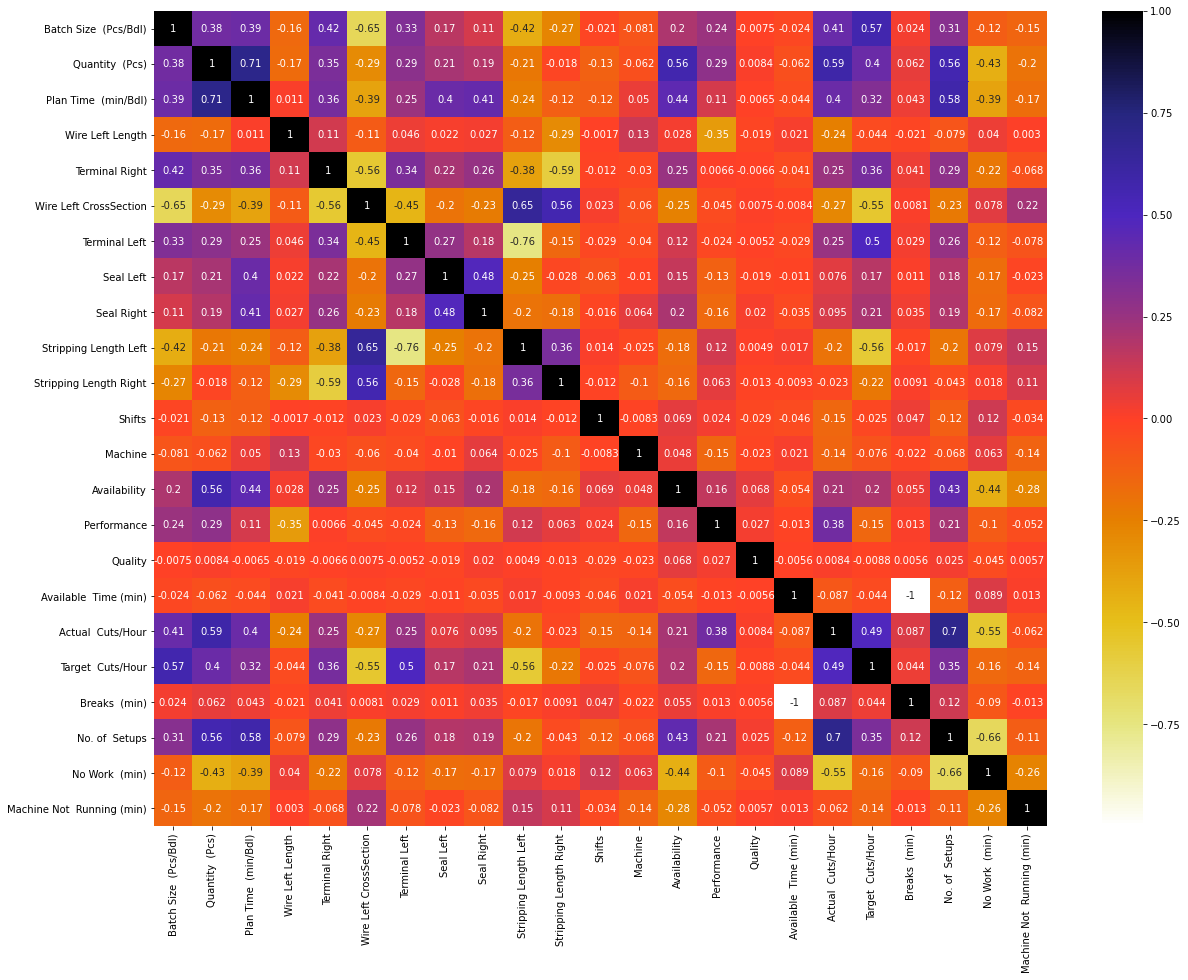

In [86]:
#Using Pearson Correlation
plt.figure(figsize=(20,15))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [87]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [88]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

1

In [89]:
corr_features

{'Breaks  (min)'}

In [90]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [91]:
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.04137567, 0.68082678, 0.2304314 , 0.07555532, 0.05106239,
       0.08766212, 0.02619724, 0.04558938, 0.06684717, 0.134324  ,
       0.09479655, 0.03878319, 0.25092767, 0.91298594, 0.70265861,
       0.02651836, 0.03606061, 0.71084578, 0.09736714, 0.55704618,
       0.3862156 , 0.4578938 ])

In [92]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Availability                  0.912986
Actual  Cuts/Hour             0.710846
Performance                   0.702659
Quantity  (Pcs)               0.680827
No. of  Setups                0.557046
Machine Not  Running (min)    0.457894
No Work  (min)                0.386216
Machine                       0.250928
Plan Time  (min/Bdl)          0.230431
Stripping Length Left         0.134324
Target  Cuts/Hour             0.097367
Stripping Length Right        0.094797
Wire Left CrossSection        0.087662
Wire Left Length              0.075555
Seal Right                    0.066847
Terminal Right                0.051062
Seal Left                     0.045589
Batch Size  (Pcs/Bdl)         0.041376
Shifts                        0.038783
Available  Time (min)         0.036061
Quality                       0.026518
Terminal Left                 0.026197
dtype: float64

<AxesSubplot:>

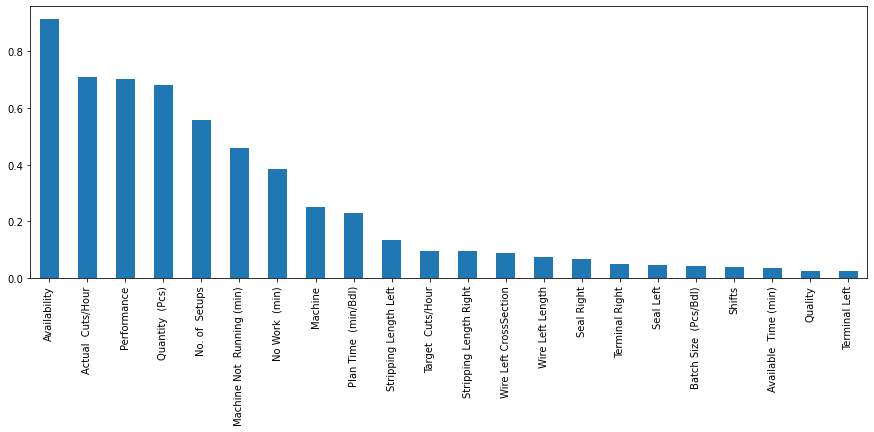

In [93]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [ ]:
## Selecting the top 90 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=90)
selected_top_columns.fit(X_train, y_train)

In [ ]:
X_train.shape

In [ ]:
len(X_train.columns[selected_top_columns.get_support()])

In [ ]:
X_train.columns[selected_top_columns.get_support()]

In [ ]:
constant_noInfluenc = [column for column in X_train.columns
                    if column not in X_train.columns[selected_top_columns.get_support()]]

In [ ]:
constant_noInfluenc

In [ ]:
X_train.drop(constant_noInfluenc,axis=1,inplace=True)
X_test.drop(constant_noInfluenc,axis=1,inplace=True)

In [ ]:
X_test.shape,X_train.shape

In [ ]:
X_train.columns

DataViz

In [ ]:
# Traçons de la distribution du TRS
plt.figure(figsize=(10,8))
    
sns.kdeplot(y_train,shade = False, alpha = 0.8);
    
plt.xlabel('OEE', size = 8); plt.ylabel('Density', size = 8); 
plt.title('Density Plot of OEE', size = 8);


In [ ]:
sns.distplot(X_train['Quantity  (Pcs)'], bins=20)

densite de nombre de machine not Running

In [ ]:
sns.distplot(X_train['Machine Not  Running (min)'], bins=20)

Model

In [ ]:
# Fonction pour calculer l'erreur absolue moyenne
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [ ]:
def fit_and_evaluate(model):
    
    model.fit(X_train, y_train)
    
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [ ]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

In [ ]:
random_forest = RandomForestRegressor(random_state=0)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

In [ ]:
gradient_boosted = GradientBoostingRegressor(random_state=4)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Pour avoir une idée des prédictions, nous pouvons tracer la distribution des valeurs vraies sur l'ensemble de test et les valeurs prédites sur l'ensemble de test.

In [ ]:
final_pred = random_forest.predict(X_test)
plt.figure(figsize=(8, 6)) 

# Tracé de densité des prédictions finales et des valeurs de test.
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Labelisation
plt.xlabel('OEE'); plt.ylabel('Density');
plt.title('Test Values and Predictions');
plt.legend()